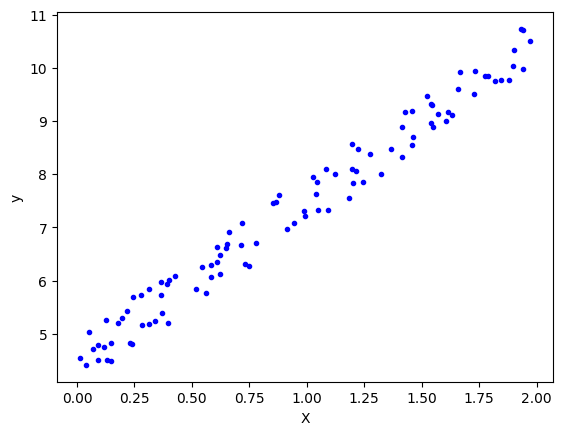

In [2]:
# create random data points to apply linear regression to
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
# compute the regression normal to obtain the optimal coefficients
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.51359766],
       [2.98323418]])

In [4]:
# perform the normal calc quicker by using the pseudoinv, which factors the X portion of the normal formula
theta_best = np.linalg.pinv(X_b) @ y
theta_best

array([[4.51359766],
       [2.98323418]])

In [5]:
# predict an output given the learned coefficients
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.51359766],
       [10.48006601]])

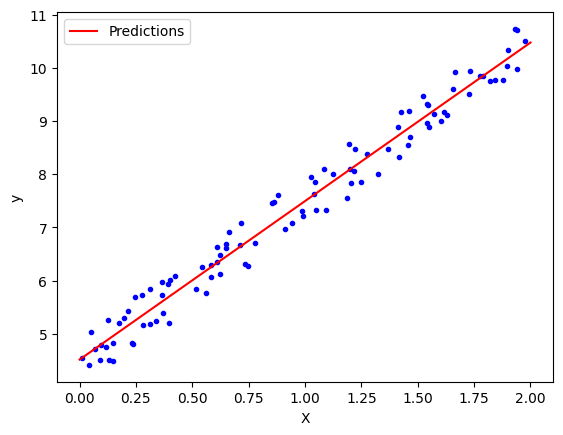

In [6]:
# plot the regression prediction line
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
# perform the linear regression with the sklearn tools
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f'intercept: {lin_reg.intercept_}')
print(f'coef: {lin_reg.coef_}')
print(f'X_new prediction: {lin_reg.predict(X_new)}')

intercept: [4.51359766]
coef: [[2.98323418]]
X_new prediction: [[ 4.51359766]
 [10.48006601]]


In [8]:
# use the lstsq() function directly that uses SVD, on which LinearRegression() is based
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [9]:
# implement a quick batch gradient descent to compute the optimal theta
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.rand(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta -= eta * gradients

theta

array([[4.51359766],
       [2.98323418]])

In [10]:
# implement SGD with a simple learning schedule
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.rand(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta -= eta * gradients

theta

array([[4.51519945],
       [2.97776947]])

In [11]:
# compute SGD with the built in SGDRegressor classifier
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # ravel() turns the labels into 1D, which is expected by fit()
print(f'intercept: {sgd_reg.intercept_} \ncoef: {sgd_reg.coef_}')

intercept: [4.50316965] 
coef: [2.99156535]


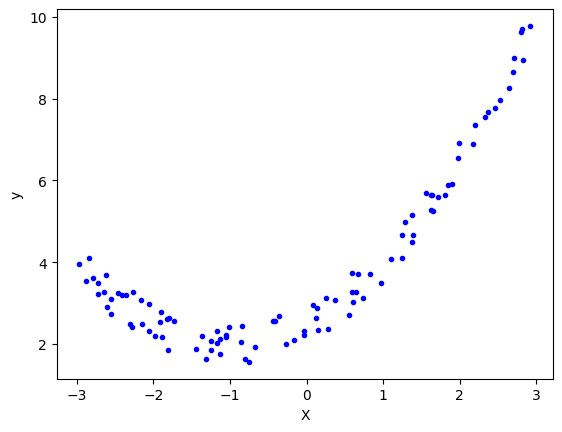

In [12]:
# create a polynomial space
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [13]:
# transform the training data to perform linear regression on a polynomial
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([-0.75275929,  0.56664654])

In [14]:
# perform the linear regression on the polynomial
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.49786712]), array([[0.9943591 , 0.49967213]]))

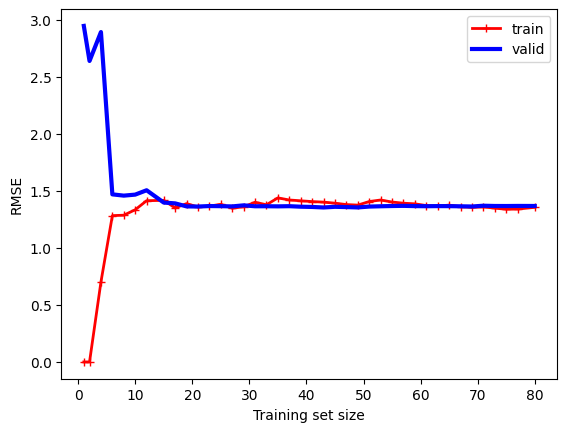

In [15]:
# explore learning curves for the plain linear regression
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

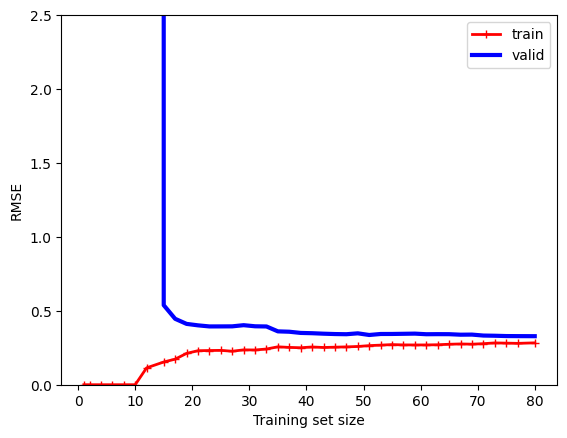

In [16]:
# explore learning curves with 10th degree polynomial features, followed by a linear regression on the same data
from sklearn.pipeline import make_pipeline
polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.ylim(0, 2.5)
plt.legend()
plt.show()

In [17]:
# apply ridge regularization with closed form
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.44714236]])

In [18]:
# apply ridge regularization with gradient descent
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1/m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.44590102])

In [19]:
# apply lasso regularization with closed form
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.3944001])

In [20]:
# apply lasso regularization with gradient descent
sgd_lasso_reg = SGDRegressor(penalty='l1', alpha=0.1, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_lasso_reg.fit(X, y.ravel())
sgd_lasso_reg.predict([[1.5]])

array([5.39321457])

In [21]:
# use elasticNet, which combines ridge and lasso
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.39746654])

In [22]:
# implement early stopping
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, y_train, X_valid, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.fit_transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

### the dataset split wasn't provided, and what we've attempted fails during sgd_reg.partial_fit()

# for epoch in range(n_epochs):
#     sgd_reg.partial_fit(X_train_prep, y_train)
#     y_valid_predict = sgd_reg.predict(X_valid_prep)
#     val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
#     if val_error < best_valid_rmse:
#         best_valid_rmse = val_error
#         best_model = deepcopy(sgd_reg)

In [25]:
# classify Iris Virginica
# load the data and look at it
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(list(iris))
print(iris.data.head(3))
print(iris.target.head(3))
print(iris.target_names)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
0    0
1    0
2    0
Name: target, dtype: int64
['setosa' 'versicolor' 'virginica']


In [27]:
# split the data and train a log regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

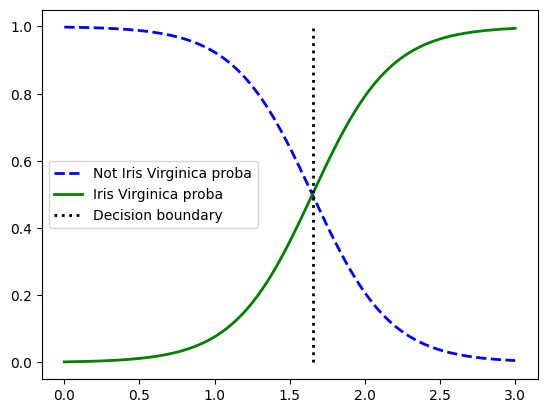

In [30]:
# observe the model's probability estimations
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2, label='Not Iris Virginica proba')
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label='Iris Virginica proba')
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', linewidth=2, label='Decision boundary')
plt.legend()
plt.show()